## - Exercici 1
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')



In [2]:
ds = pd.read_csv('housing data.csv', sep=',', header=None)
df_housing = pd.DataFrame(ds)
df_housing

0     1      2   3      4      5     6       7   8      9     10  \
0    0.00632  18.0   2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1    0.02731   0.0   7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2    0.02729   0.0   7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3    0.03237   0.0   2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4    0.06905   0.0   2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   
..       ...   ...    ...  ..    ...    ...   ...     ...  ..    ...   ...   
501  0.06263   0.0  11.93   0  0.573  6.593  69.1  2.4786   1  273.0  21.0   
502  0.04527   0.0  11.93   0  0.573  6.120  76.7  2.2875   1  273.0  21.0   
503  0.06076   0.0  11.93   0  0.573  6.976  91.0  2.1675   1  273.0  21.0   
504  0.10959   0.0  11.93   0  0.573  6.794  89.3  2.3889   1  273.0  21.0   
505  0.04741   0.0  11.93   0  0.573  6.030  80.8  2.5050   1  273.0  21.0   

         11    12    13  
0    396.90  4.98  24.0  
1    396.90  9.14  21.6  
2    392.83  4.03  34.7  
3    394.63  2.94  33.4  
4    396.90  5.33  36.2  
..      ...   ...   ...  
501  391.99  9.67  22.4  
502  396.90  9.08  20.6  
503  396.90  5.64  23.9  
504  393.45  6.48  22.0  
505  396.90  7.88  11.9  

[506 rows x 14 columns]

## Variables 
* CRIM	represents crime per capita by city.
* ZN	The proportion of residential areas in a given area.
* INDUS	The proportion of acres dedicated to retail in the city.
* CHAS	Binary variable (= 1 if the tracks cross the river and 0 otherwise).
* NOX	Nitric oxide concentration (parts per million).
* RM	Average number of rooms per dwelling.
* AGE	Proportion of owner-occupied buildings, built before 1940.
* DIS	Represents the weighted distance to five employment centers in Boston.
* RAD	Radial road accessibility index.
* TAX	Total value of the tax rate per 10,000 dollars.**
* PTRATIO	Represents the ratio of students per teacher by city.**
* B	Value defined as 1000 (Bk0.63) 2 where Bk is the proportion of African Americans in the city.**
* LSTAT	Percentage of lower class in the population.**
* MEDV	Median value of owner-occupied homes at $ 1,000.**

In [3]:
df_housing.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_housing

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [4]:
df_housing.index

RangeIndex(start=0, stop=506, step=1)

In [5]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df_housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [43]:
df_housing.isnull().values.any()

False

In [44]:
df_housing.isna().values.any()

False

In [9]:
df_housing.shape

(506, 14)

<AxesSubplot:>

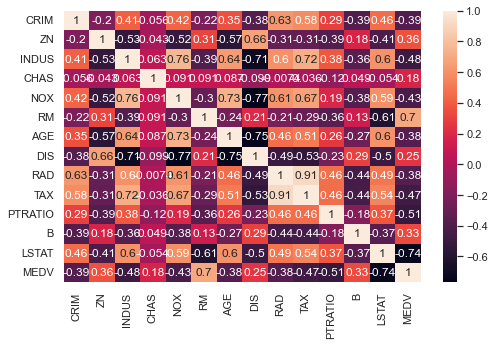

In [42]:
corr = df_housing.corr()
sns.heatmap(corr, annot=True)

<Figure size 1080x1080 with 0 Axes>

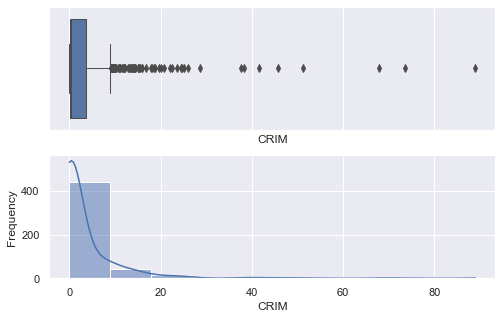

<Figure size 576x360 with 0 Axes>

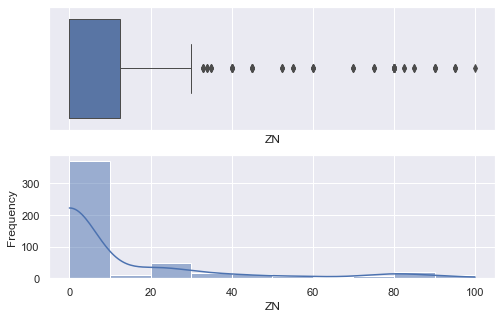

<Figure size 576x360 with 0 Axes>

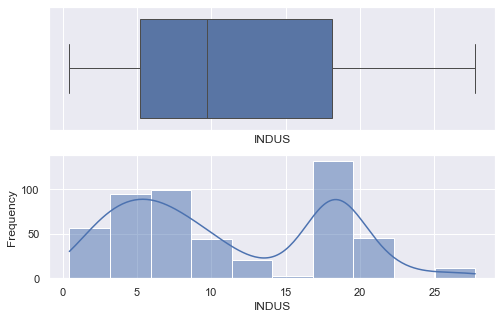

<Figure size 576x360 with 0 Axes>

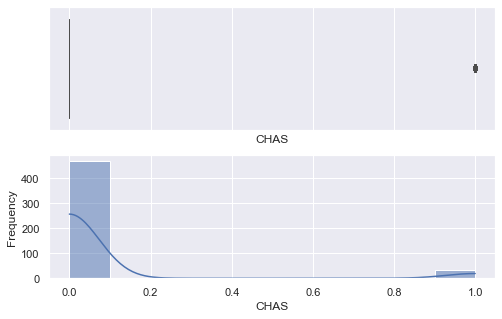

<Figure size 576x360 with 0 Axes>

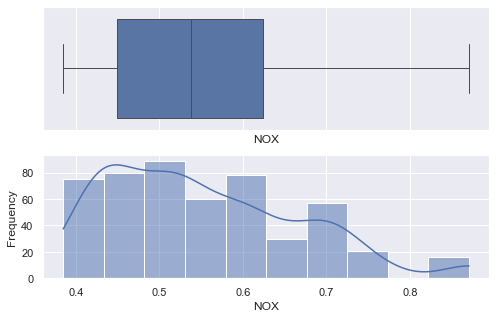

<Figure size 576x360 with 0 Axes>

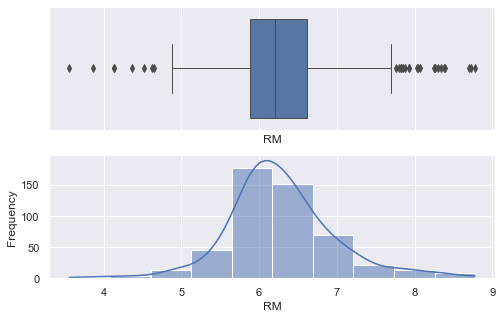

<Figure size 576x360 with 0 Axes>

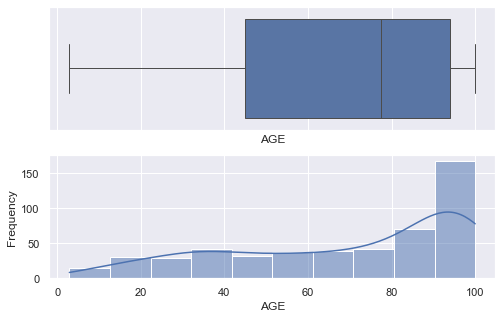

<Figure size 576x360 with 0 Axes>

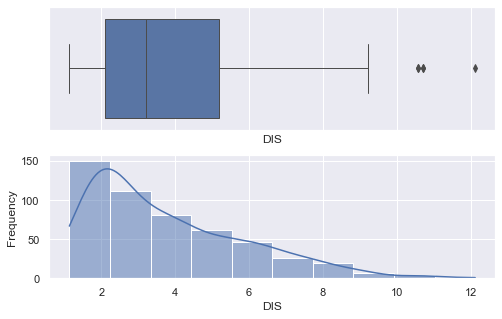

<Figure size 576x360 with 0 Axes>

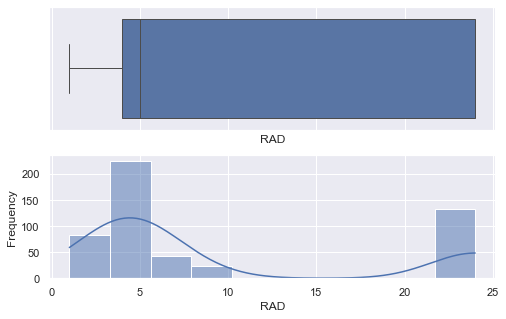

<Figure size 576x360 with 0 Axes>

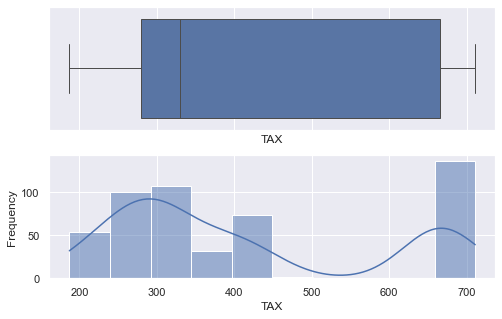

<Figure size 576x360 with 0 Axes>

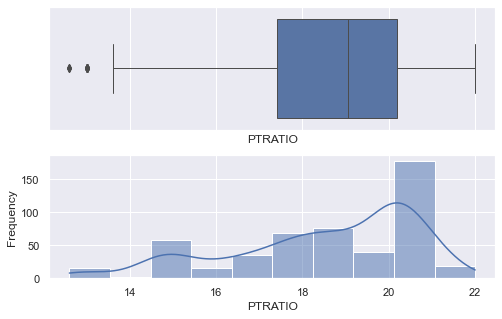

<Figure size 576x360 with 0 Axes>

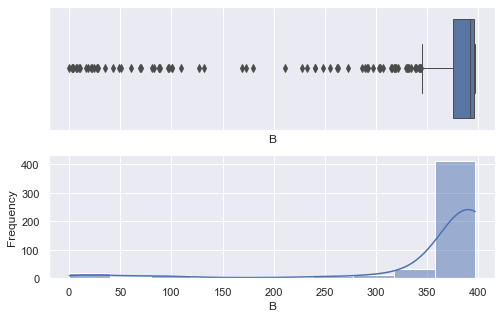

<Figure size 576x360 with 0 Axes>

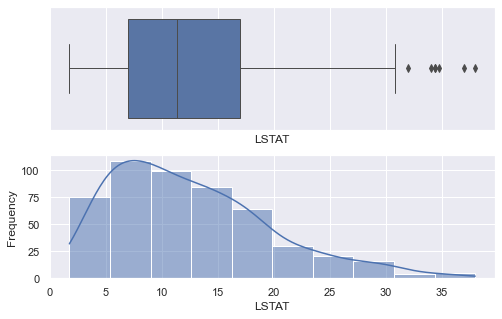

<Figure size 576x360 with 0 Axes>

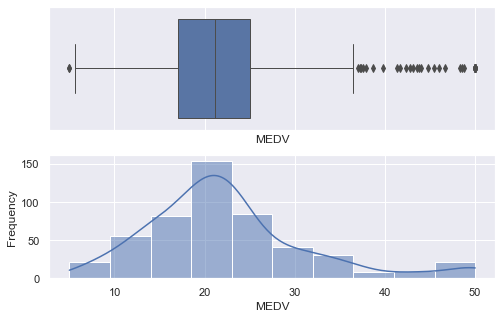

In [41]:
for i in df_housing.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df_housing[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df_housing[i], ax=ax_hist , bins = 10,kde=True)

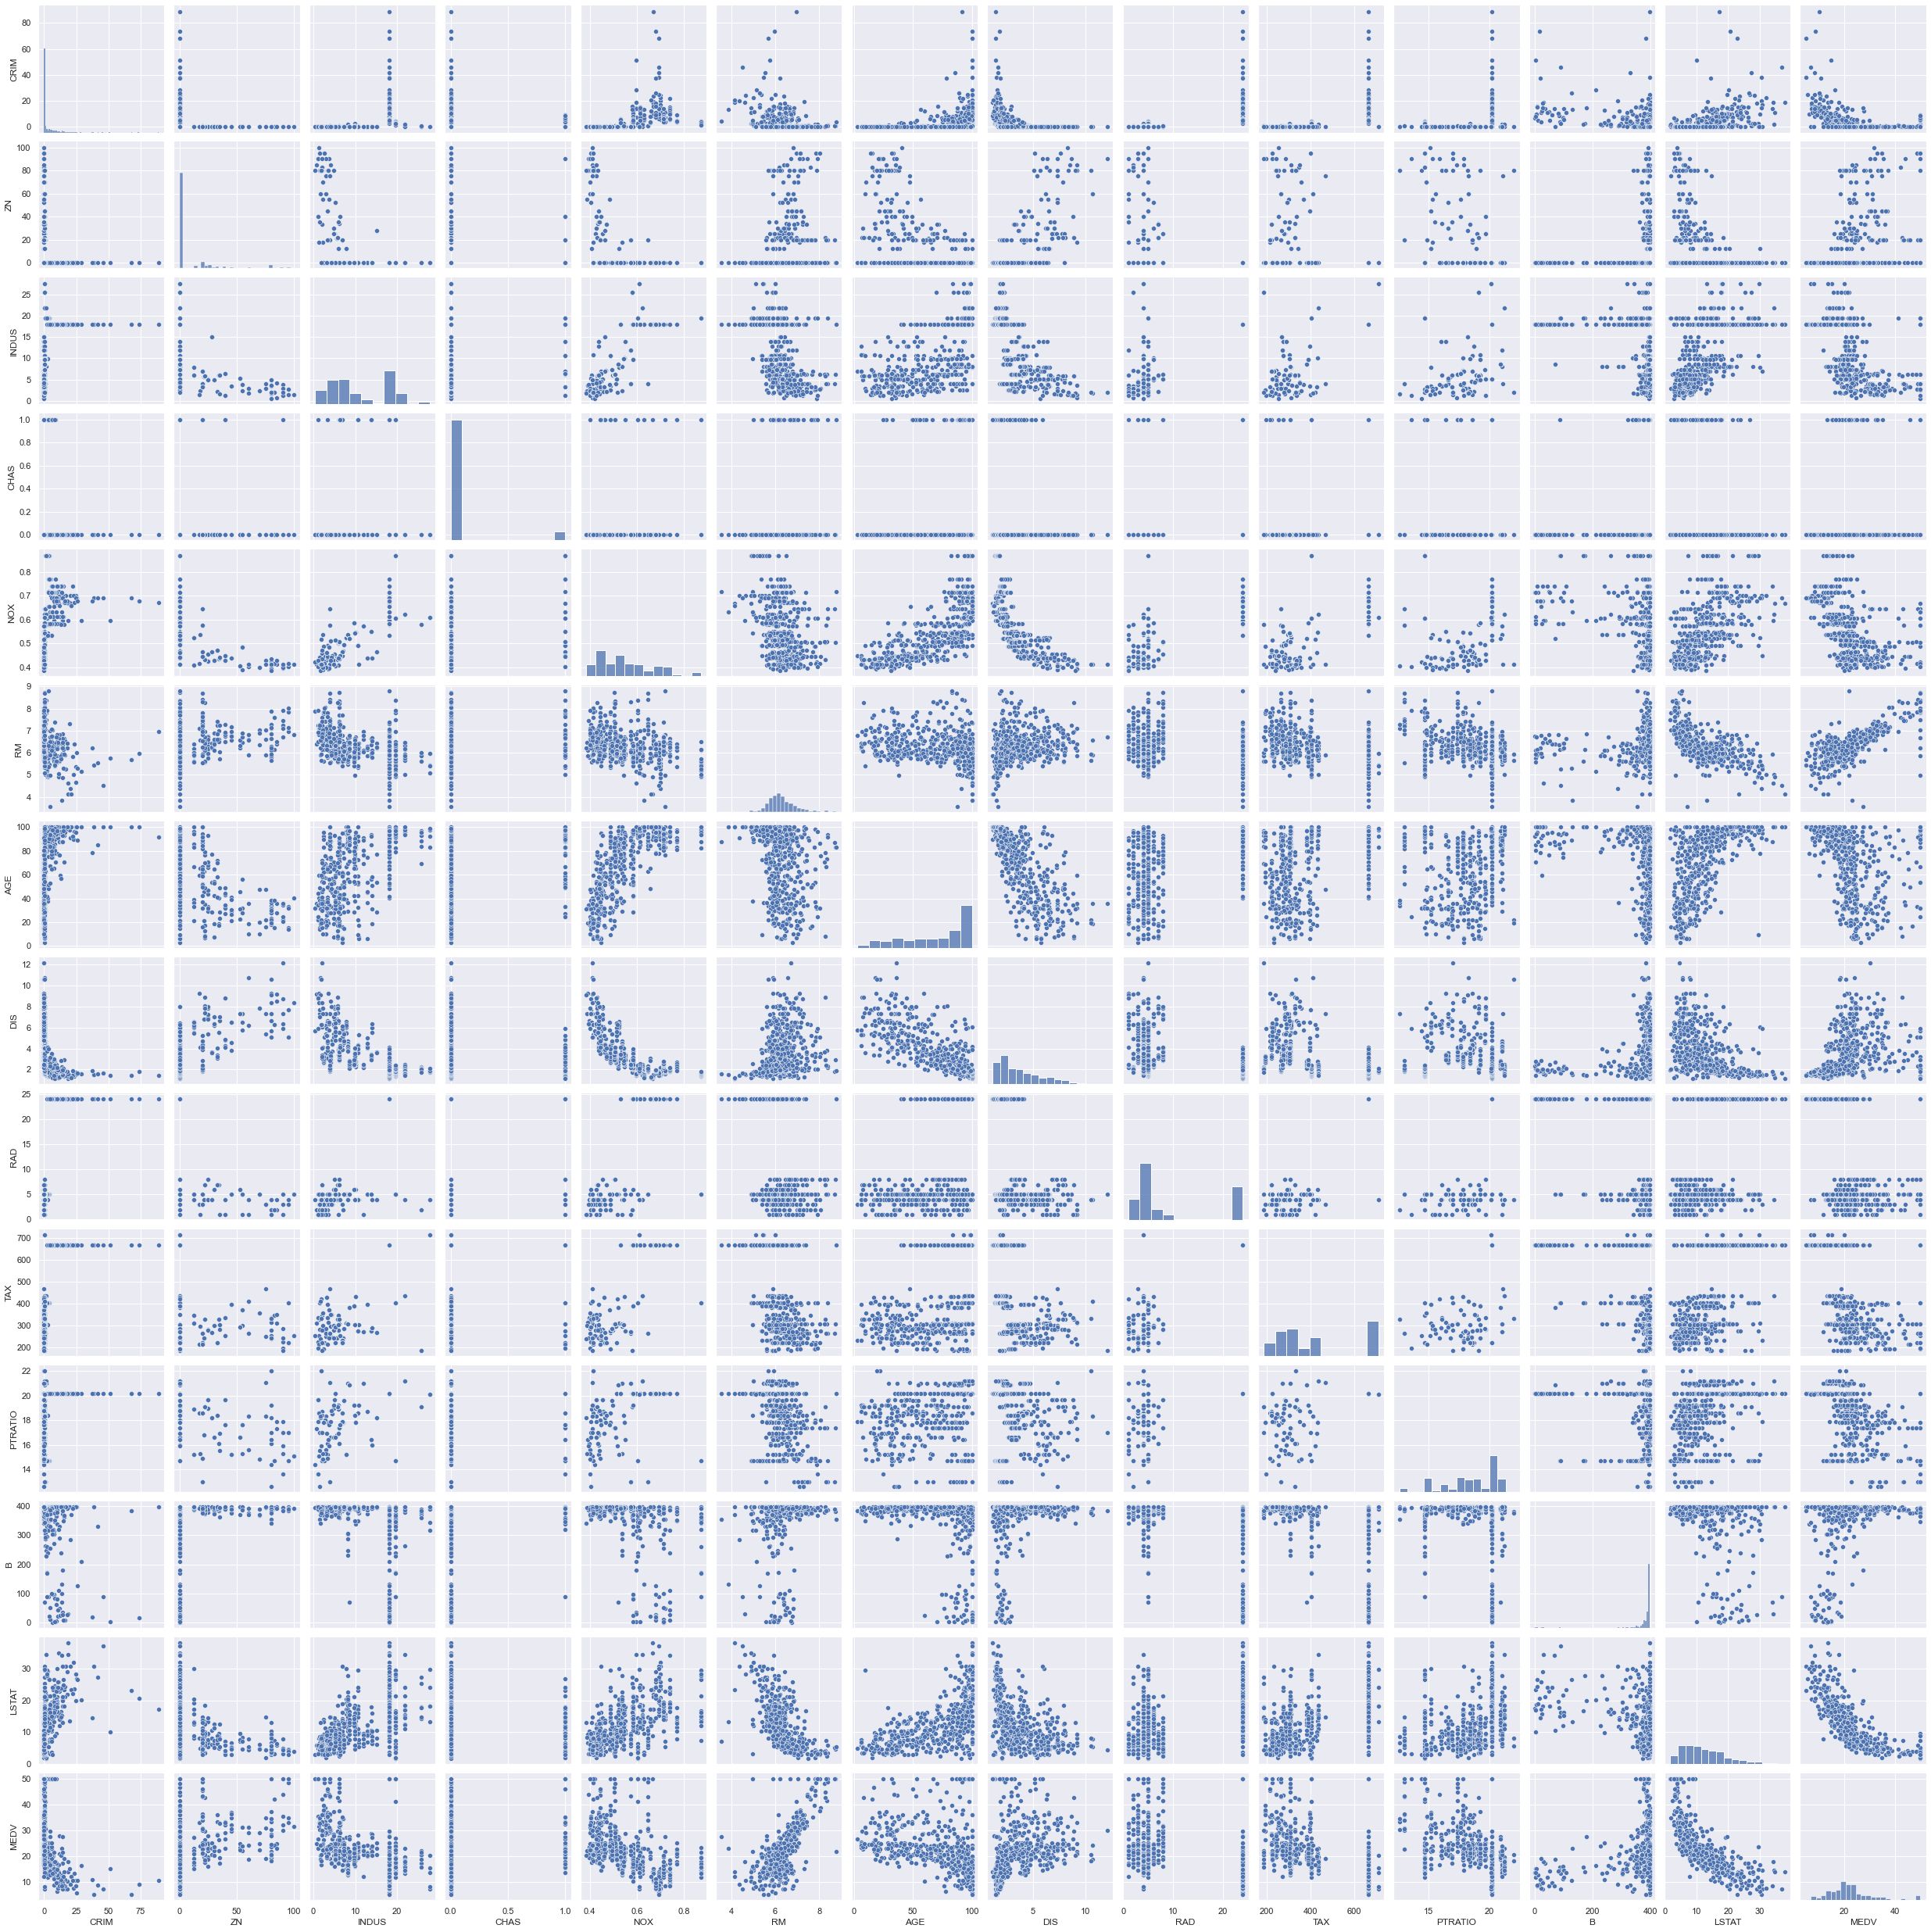

In [11]:
sns.pairplot(df_housing, diag_kind="hist")

#### División entre Features y Target.

In [12]:
#Features
X = df_housing.drop('MEDV',axis=1)
X.shape

(506, 13)

In [13]:
#Target---> columna "MEDV": Valor medio de  viviendas ocupadas por sus propietarios en 1.000 de dólares.
y = df_housing[['MEDV']]
y.shape

(506, 1)

#### División de los datos en dos grupos , un grupo para capacitación (80%) "Train" y otro grupo para pruebas (20%) "Test".  

In [14]:
#Training And Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.80)
X_train.shape

(404, 13)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 220 to 172
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 44.2 KB


In [16]:
X_train.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.386324   11.794554   11.123441    0.069307    0.555886    6.301797   
std      8.137943   23.636906    6.993011    0.254290    0.115201    0.694692   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.078935    0.000000    5.130000    0.000000    0.449000    5.887750   
50%      0.256510    0.000000    9.125000    0.000000    0.538000    6.211000   
75%      3.359357   20.000000   18.100000    0.000000    0.631000    6.675000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.027228    3.770242    9.403465  402.844059   18.462376  358.785446   
std     28.106955    2.080583    8.661147  170.857022    2.194821   88.663438   
min      2.900000    1.174200    1.000000  187.000000   12.600000    0.320000   
25%     45.675000    2.087875    4.000000  276.000000   17.400000  376.132500   
50%     77.950000    3.190950    5.000000  322.000000   19.100000  391.600000   
75%     93.900000    5.141475   24.000000  666.000000   20.200000  396.060000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  404.000000  
mean    12.706188  
std      7.299031  
min      1.730000  
25%      6.727500  
50%     11.300000  
75%     17.112500  
max     36.980000

In [45]:
X_train.isna().values.any()

False

In [46]:
X_train.isna().values.any()

False

<AxesSubplot:>

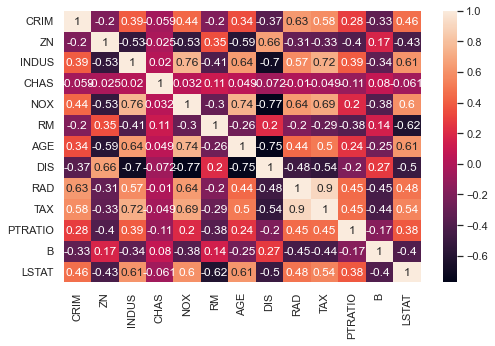

In [47]:
corr = X_train.corr()
sns.heatmap(corr, annot=True)

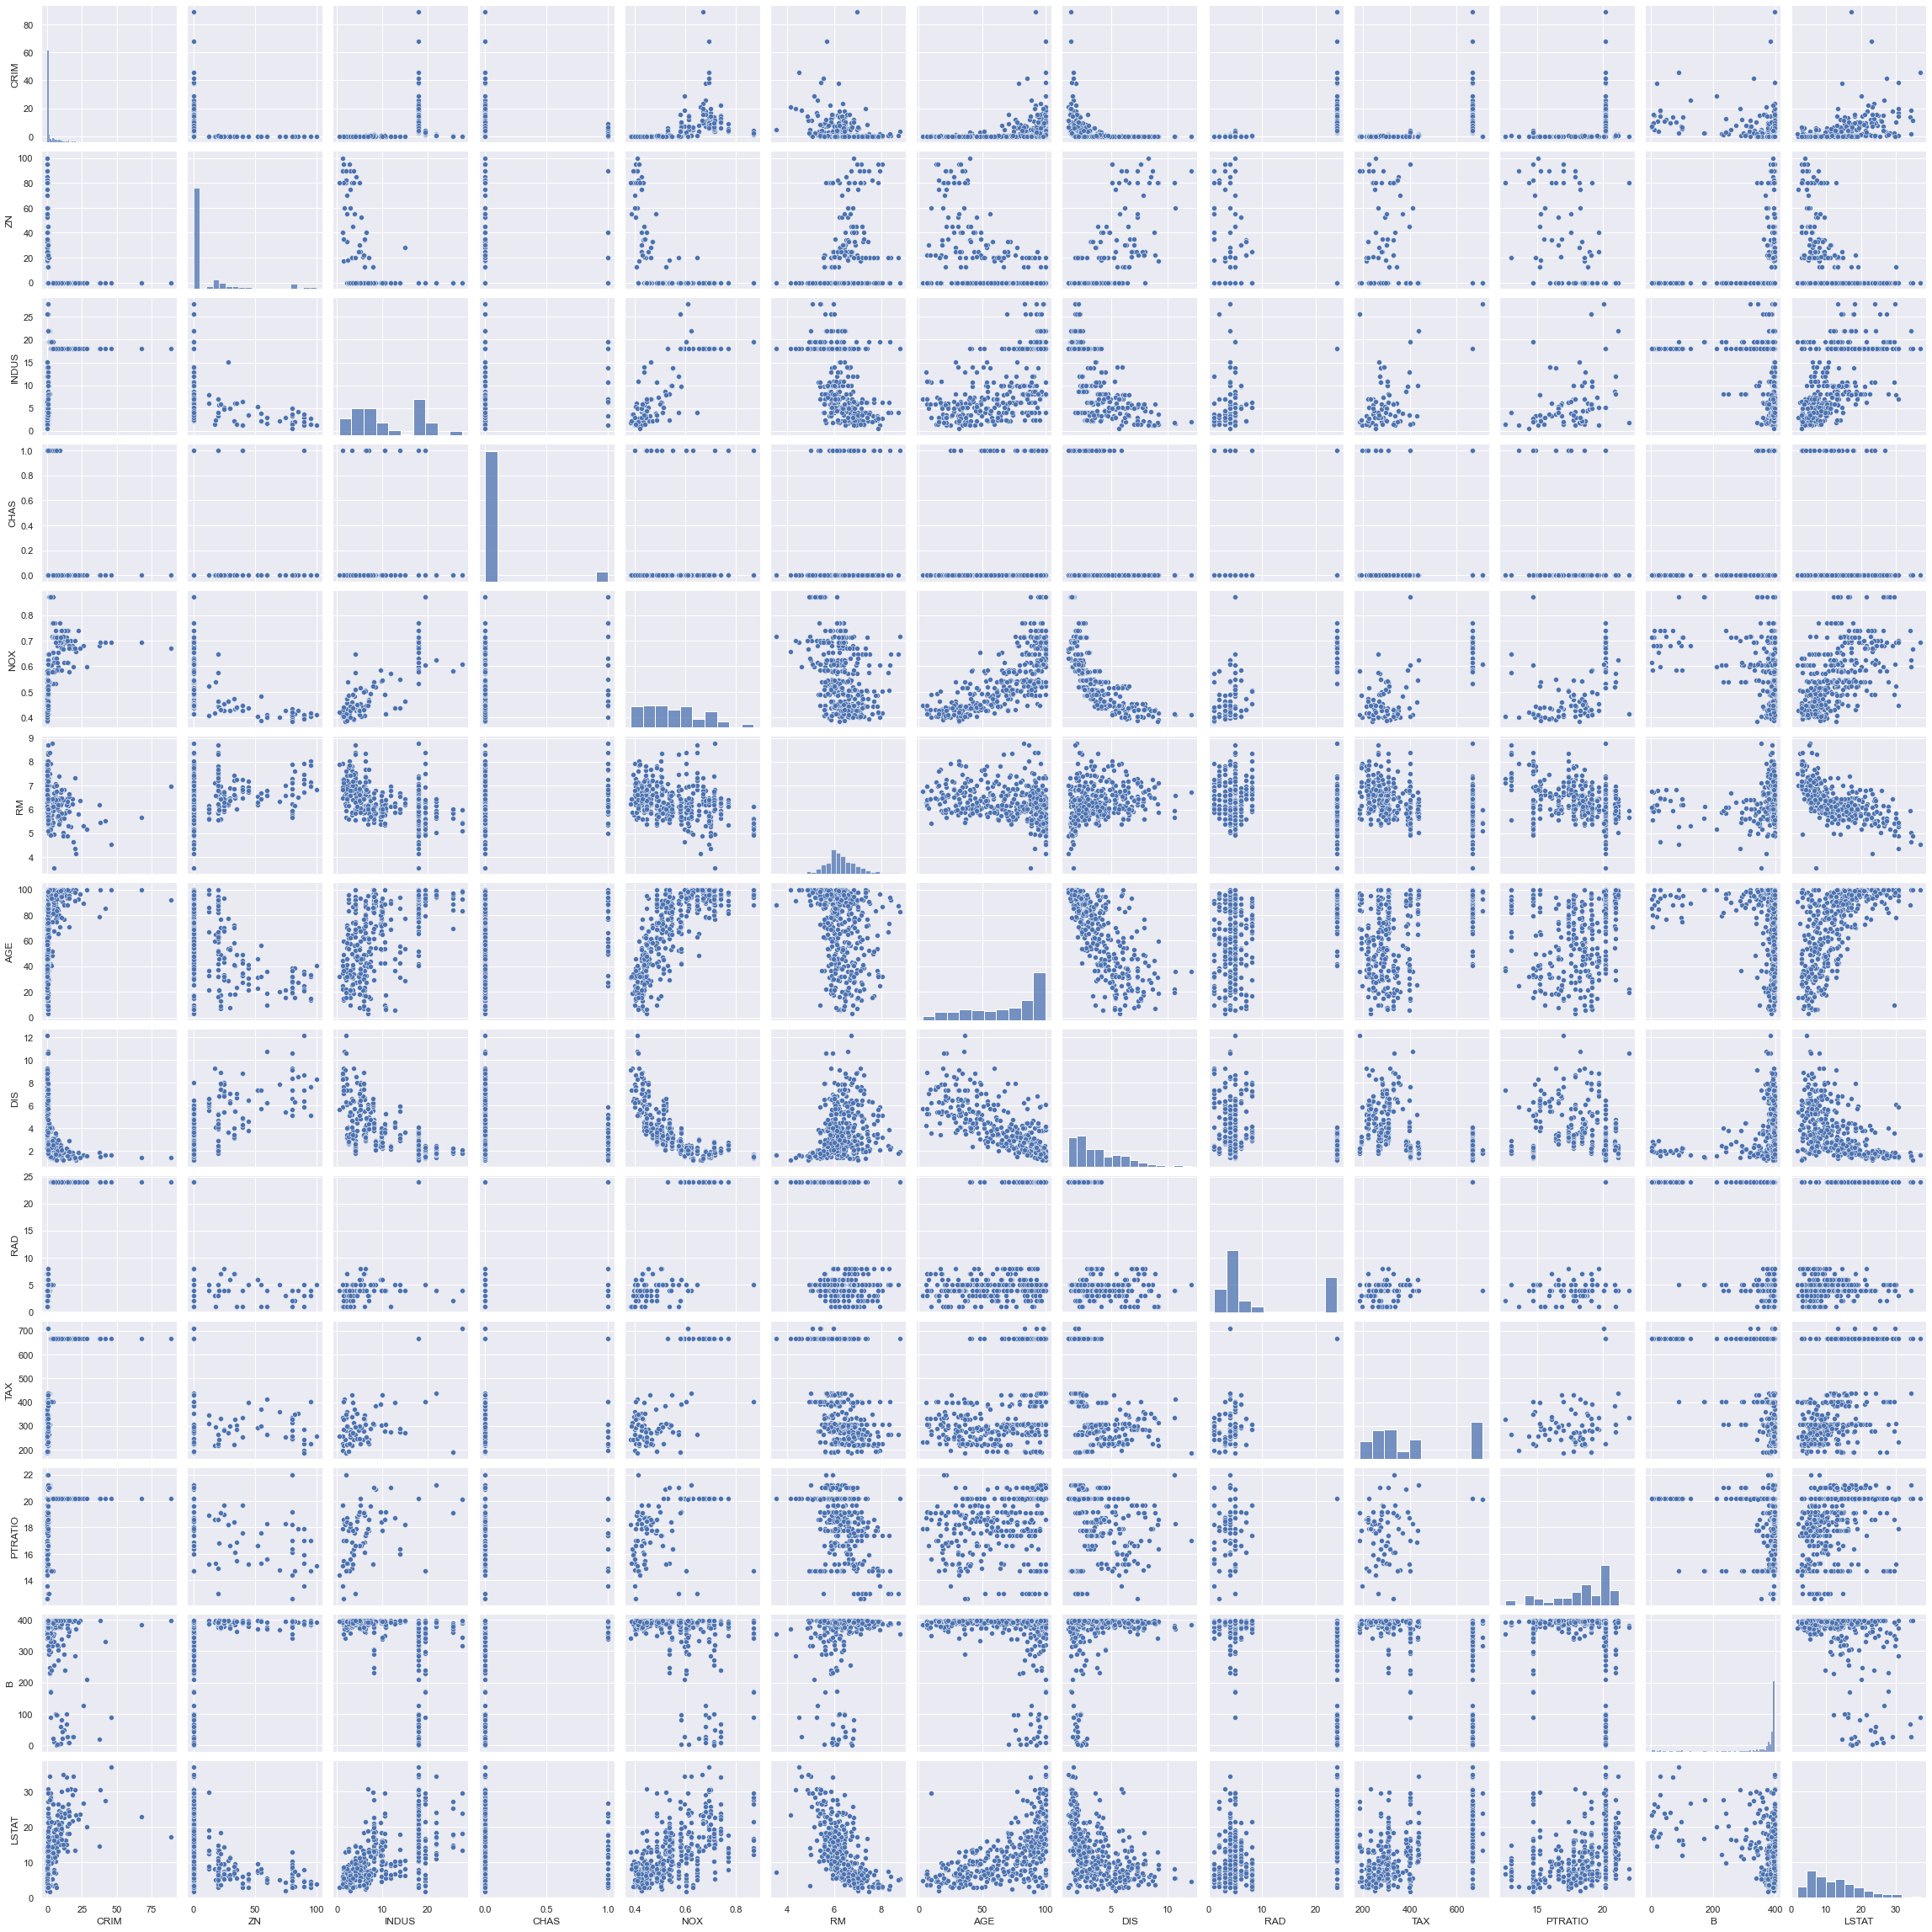

In [20]:
sns.pairplot(X_train, diag_kind="hist")

In [21]:
X_test.shape

(102, 13)

In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 329 to 108
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    float64
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 11.2 KB


In [23]:
X_test.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean     4.513411    9.656863   11.189608    0.068627    0.549979    6.216657   
std     10.230340   22.061680    6.339877    0.254068    0.118982    0.732735   
min      0.013600    0.000000    0.740000    0.000000    0.392000    3.863000   
25%      0.094115    0.000000    5.885000    0.000000    0.448000    5.881000   
50%      0.249035    0.000000    9.900000    0.000000    0.520000    6.157000   
75%      5.178705    0.000000   18.100000    0.000000    0.605000    6.469000   
max     73.534100   85.000000   21.890000    1.000000    0.871000    8.725000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean    66.783333    3.893275   10.127451  429.598039   18.428431  348.311176   
std     28.382215    2.210300    8.907302  158.010105    2.052498  101.085667   
min      8.400000    1.129600    1.000000  224.000000   12.600000    2.600000   
25%     39.625000    2.135475    4.000000  304.000000   16.900000  366.755000   
50%     72.550000    3.347500    5.000000  384.000000   18.700000  390.680000   
75%     95.200000    5.186050   24.000000  666.000000   20.200000  396.900000   
max    100.000000   10.710300   24.000000  666.000000   21.200000  396.900000   

            LSTAT  
count  102.000000  
mean    12.442647  
std      6.507064  
min      1.920000  
25%      8.027500  
50%     11.550000  
75%     15.705000  
max     37.970000

In [48]:
X_test.isnull().values.any()

False

In [50]:
X_test.isna().values.any()

False

<AxesSubplot:>

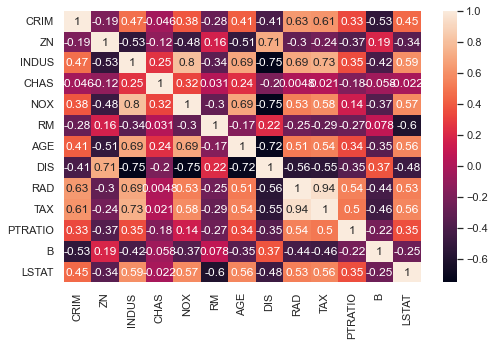

In [51]:
corr = X_test.corr()
sns.heatmap(corr, annot=True)

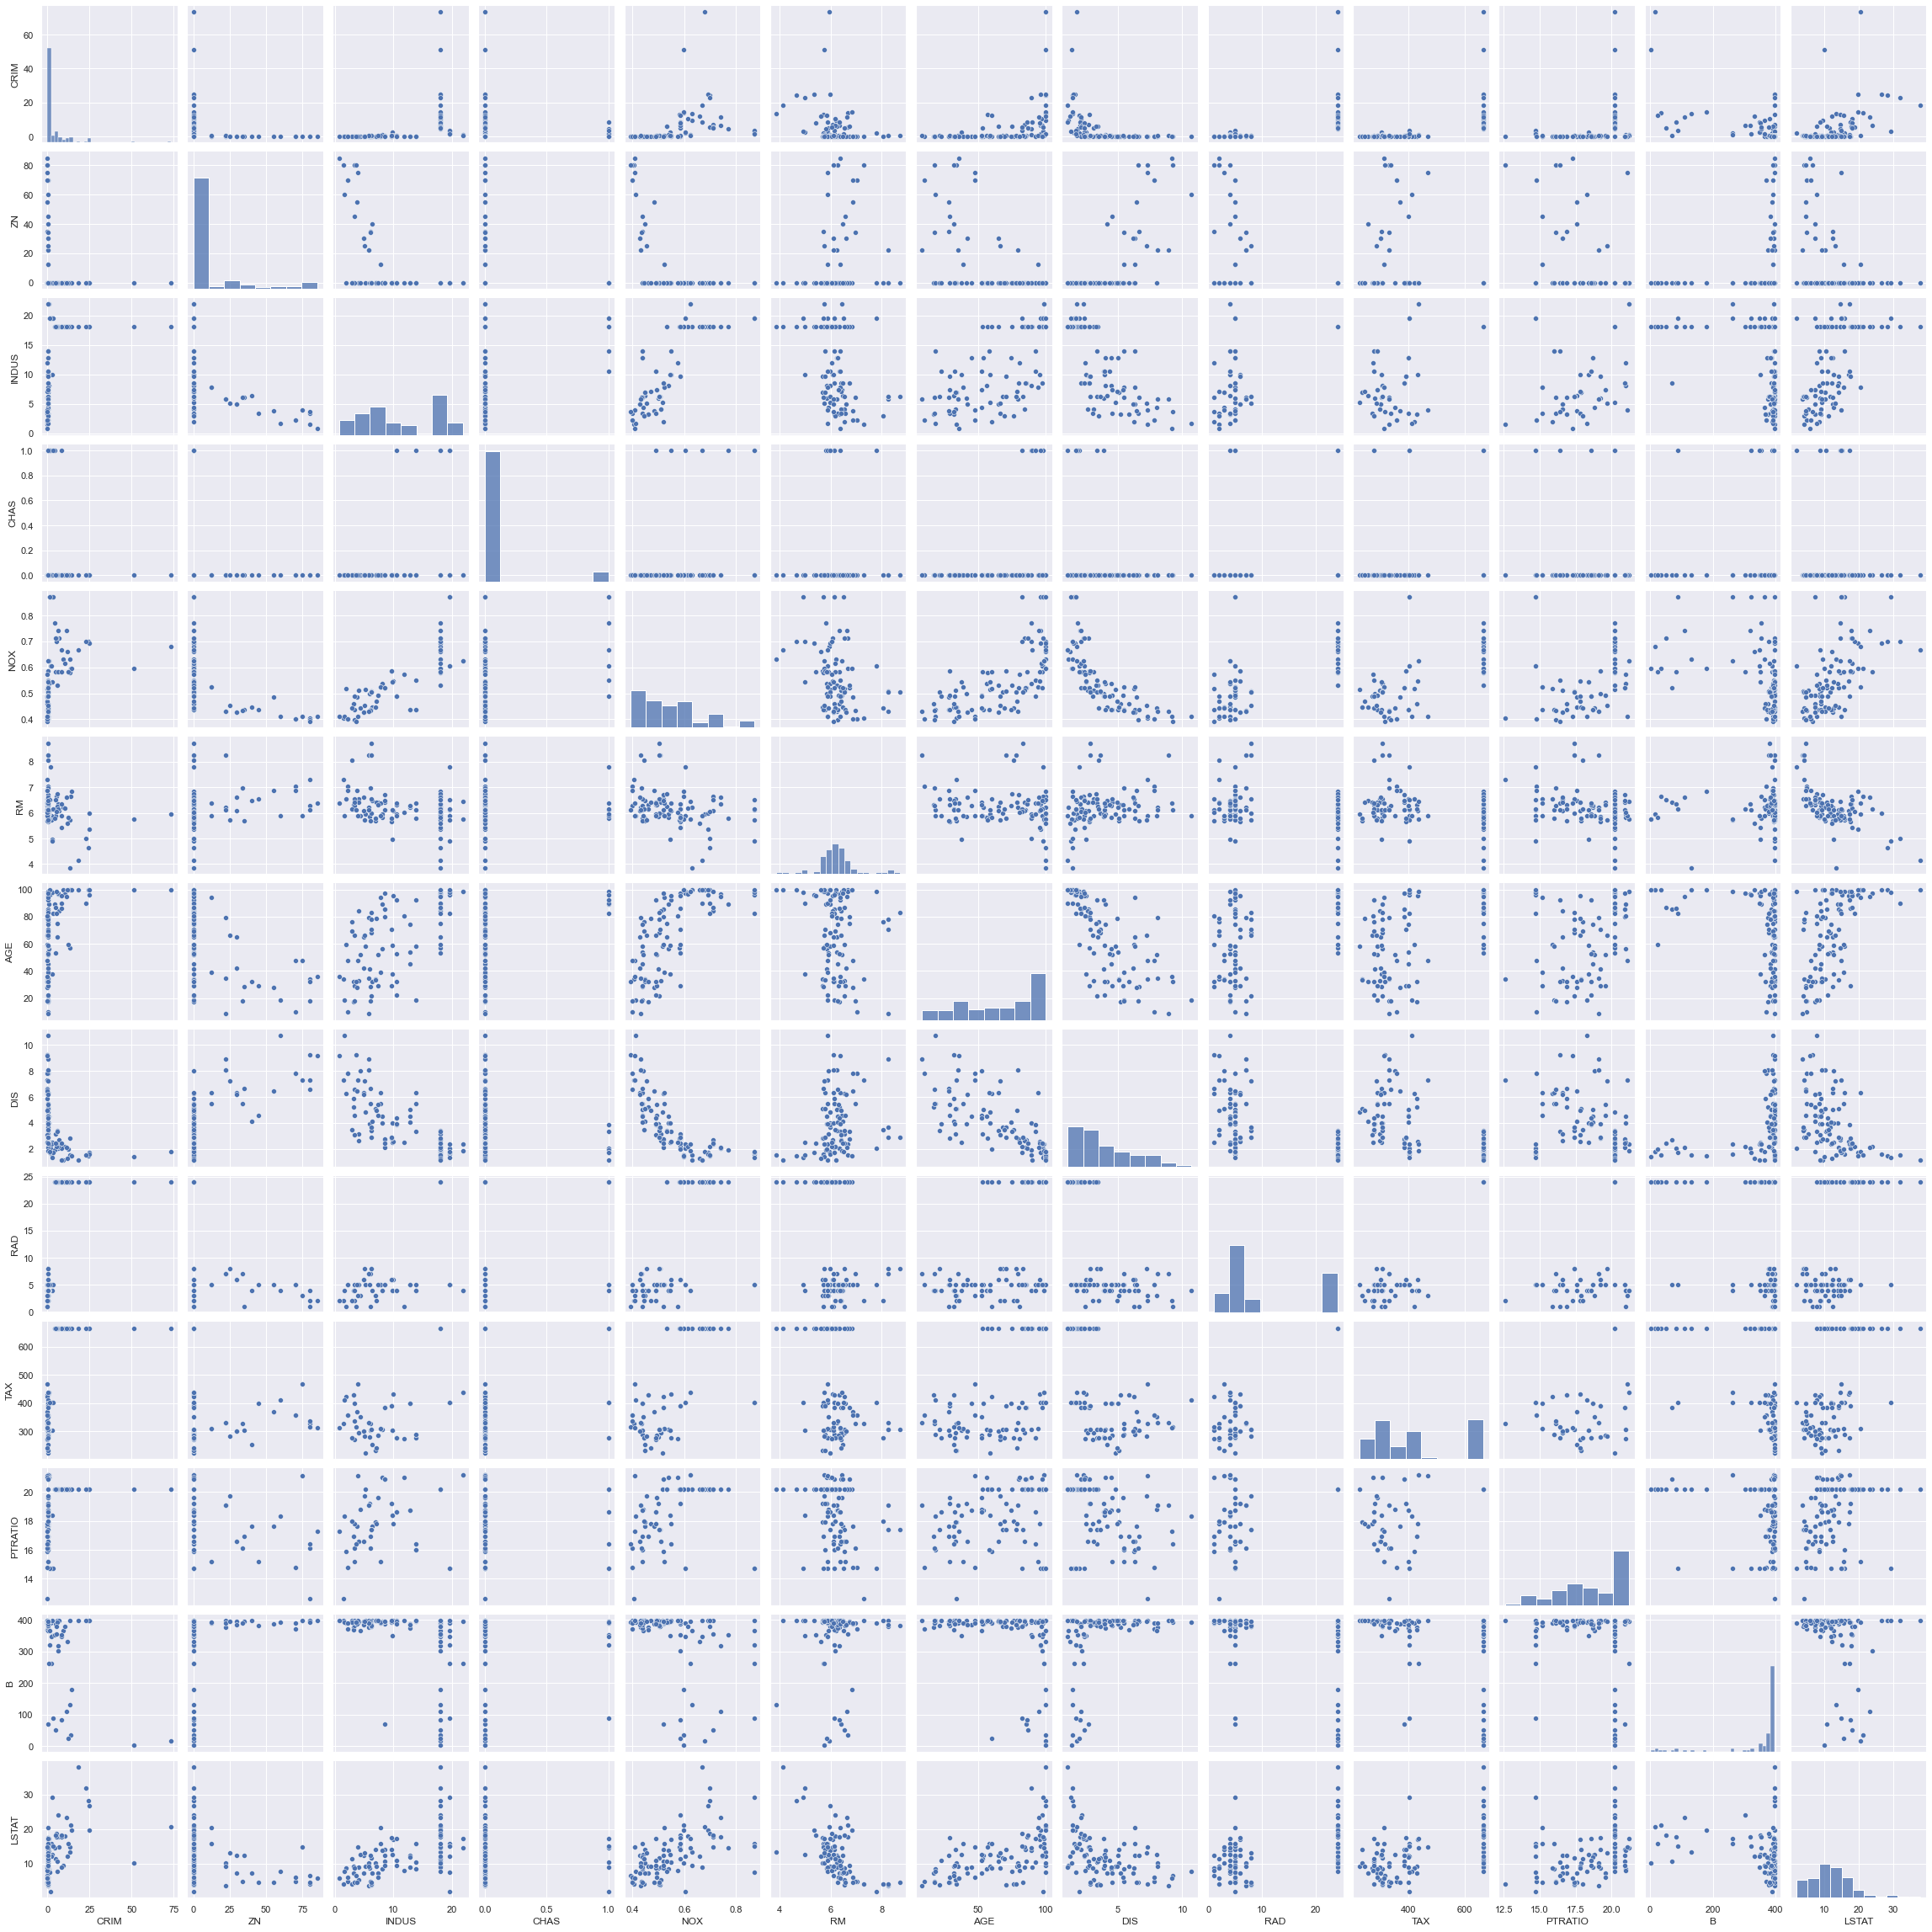

In [27]:
sns.pairplot(X_test, diag_kind="hist")

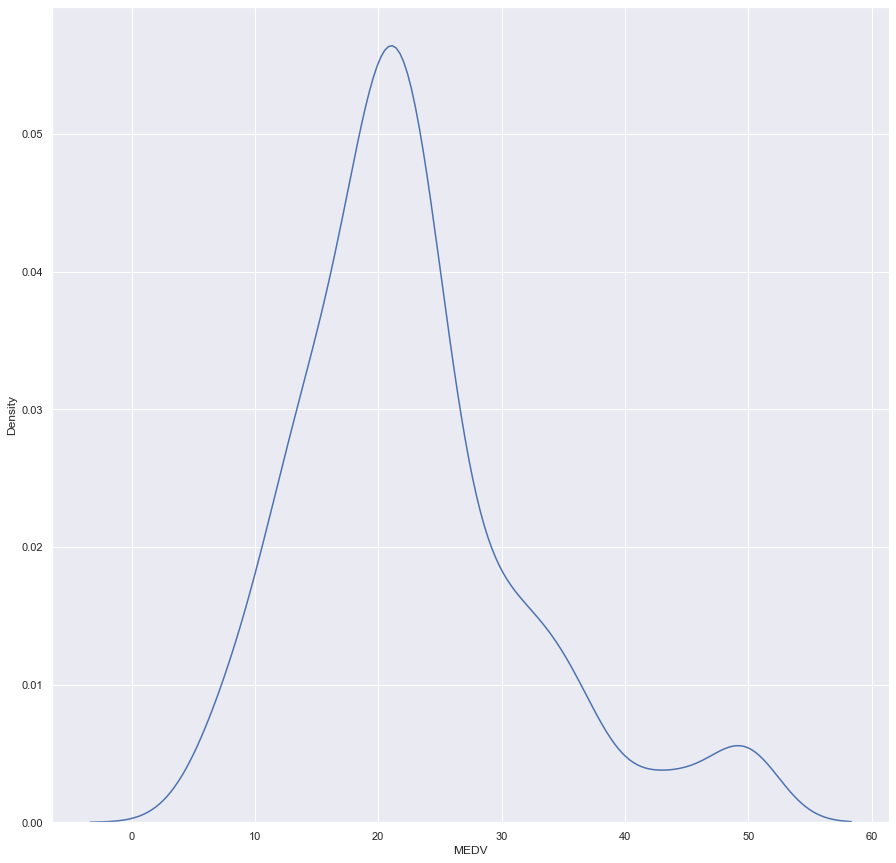

In [28]:
sns.kdeplot(y_train['MEDV'])
plt.show()

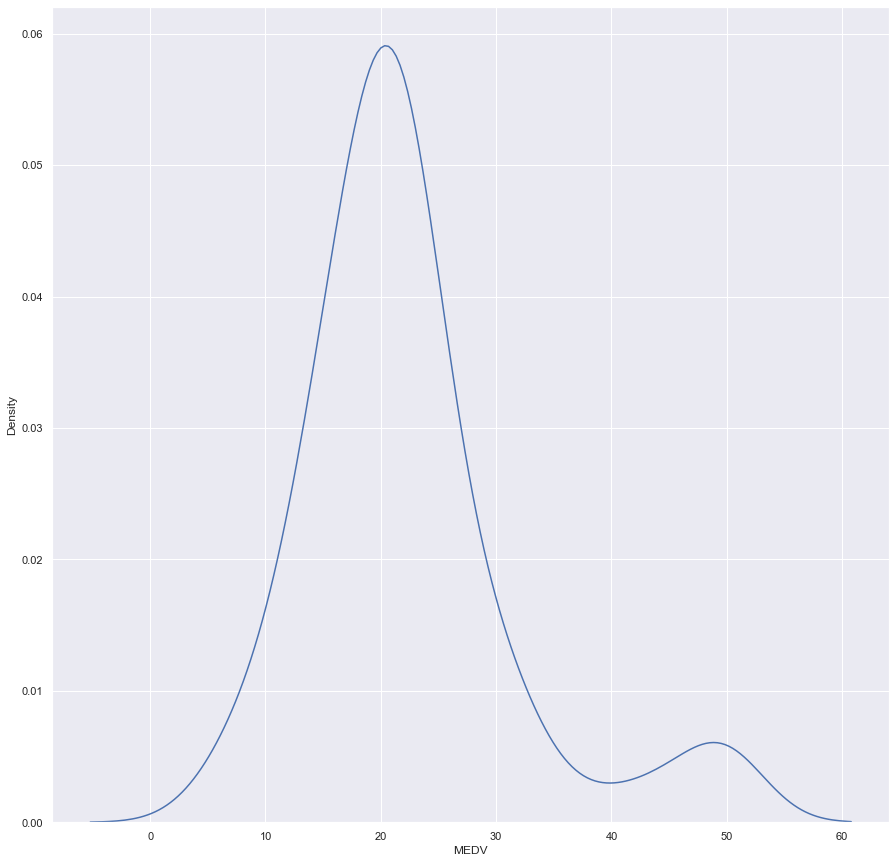

In [29]:
sns.kdeplot(y_test['MEDV'])
plt.show()

Se observa que la variable "MEDV": Valor medio de  viviendas ocupadas por sus propietarios en 1.000 de dólares, tiene similiar distribución tanto en Train como en Test. 

<Figure size 576x360 with 0 Axes>

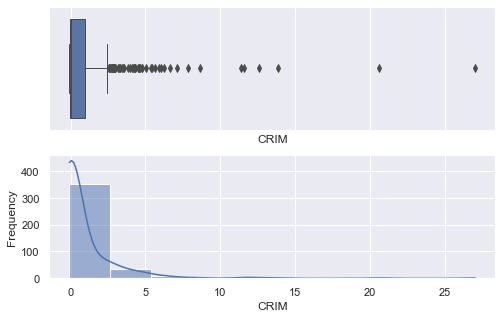

<Figure size 576x360 with 0 Axes>

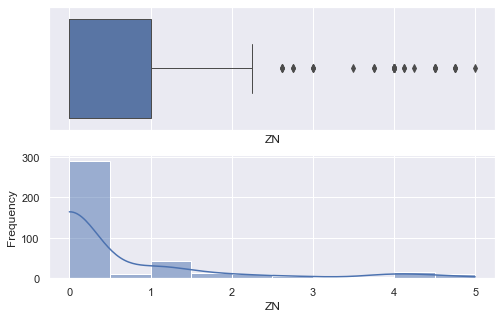

<Figure size 576x360 with 0 Axes>

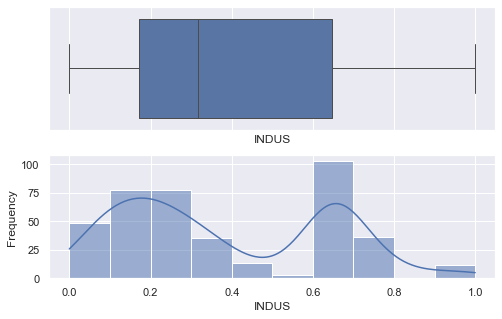

<Figure size 576x360 with 0 Axes>

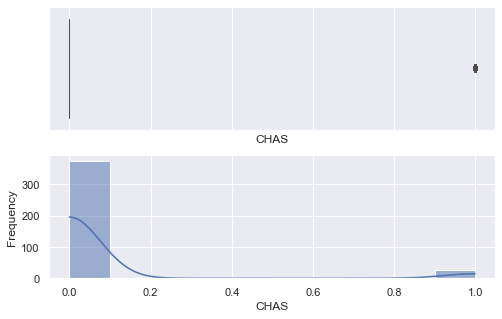

<Figure size 576x360 with 0 Axes>

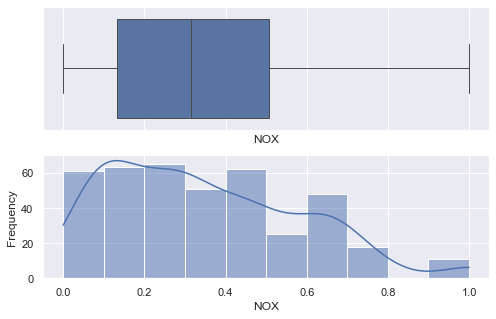

<Figure size 576x360 with 0 Axes>

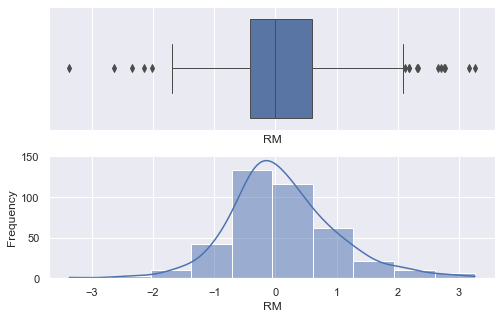

<Figure size 576x360 with 0 Axes>

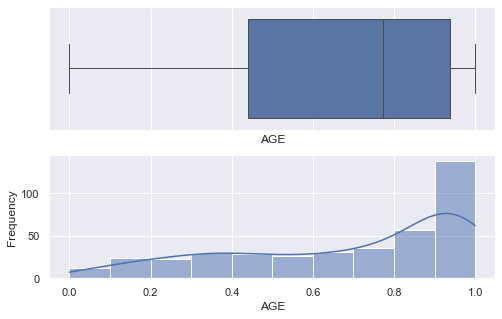

<Figure size 576x360 with 0 Axes>

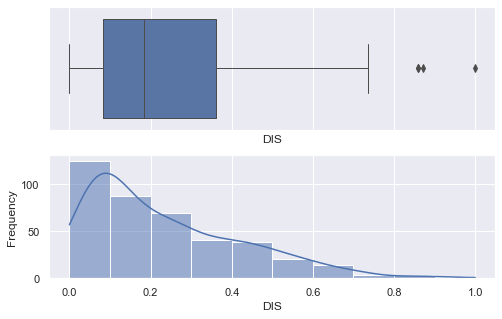

<Figure size 576x360 with 0 Axes>

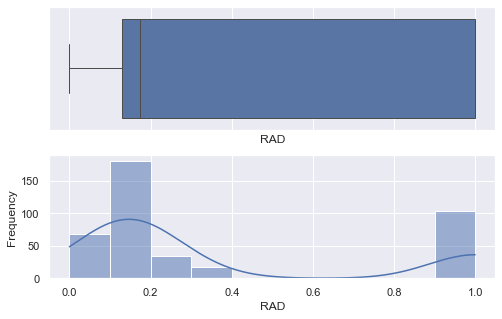

<Figure size 576x360 with 0 Axes>

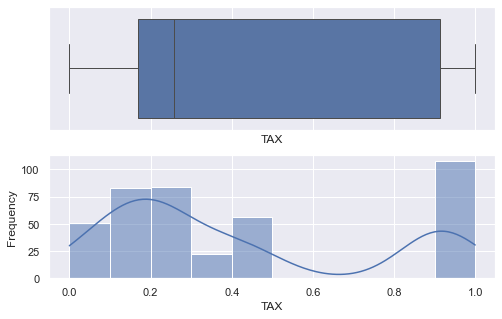

<Figure size 576x360 with 0 Axes>

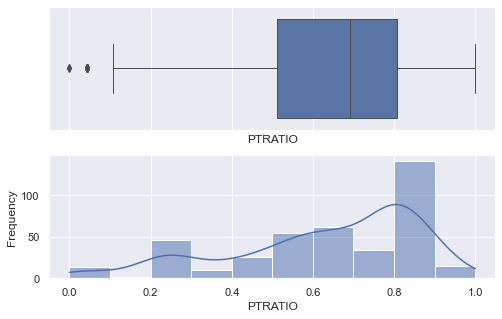

<Figure size 576x360 with 0 Axes>

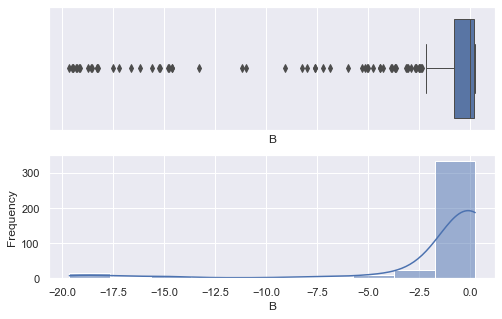

<Figure size 576x360 with 0 Axes>

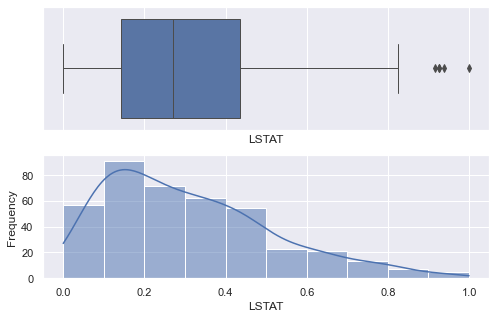

In [71]:
for i in X_train.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(X_train[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(X_train[i], ax=ax_hist , bins = 10,kde=True)

<Figure size 576x360 with 0 Axes>

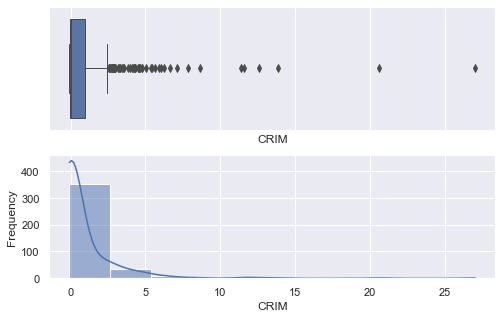

<Figure size 576x360 with 0 Axes>

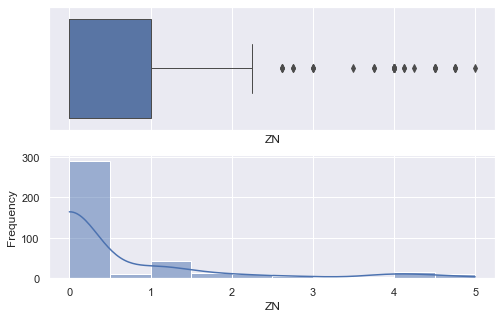

<Figure size 576x360 with 0 Axes>

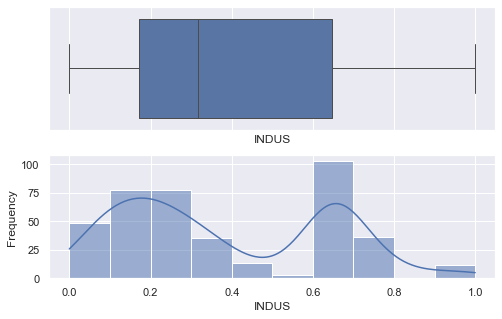

<Figure size 576x360 with 0 Axes>

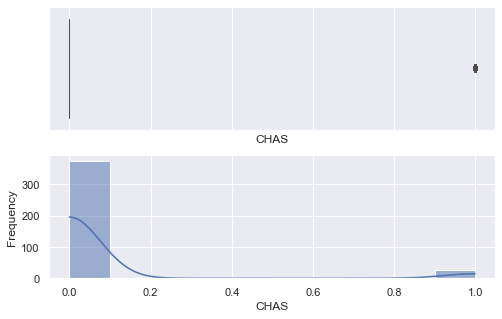

<Figure size 576x360 with 0 Axes>

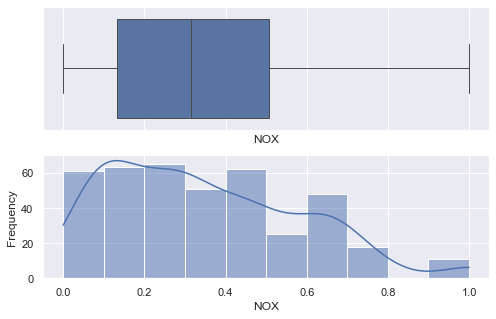

<Figure size 576x360 with 0 Axes>

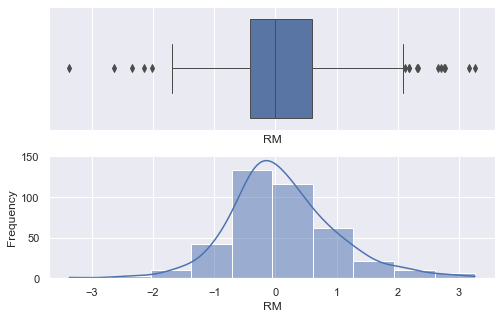

<Figure size 576x360 with 0 Axes>

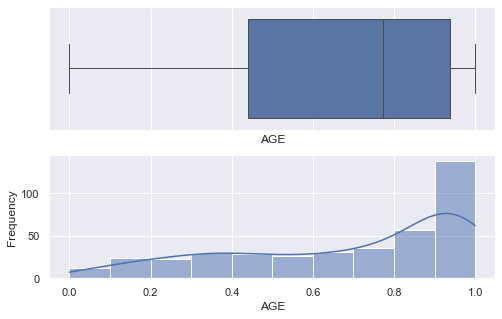

<Figure size 576x360 with 0 Axes>

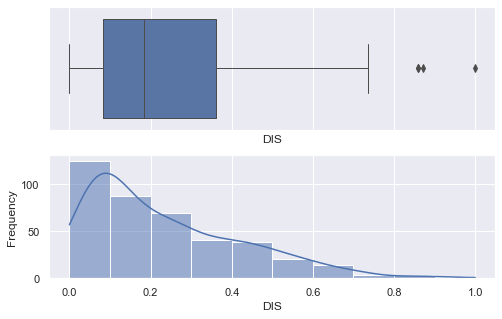

<Figure size 576x360 with 0 Axes>

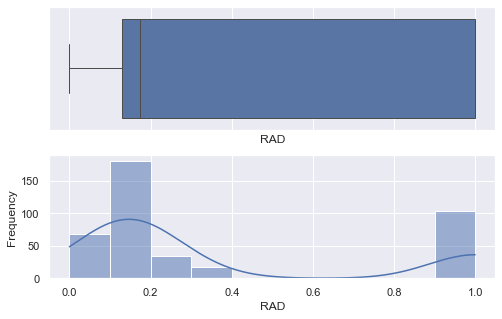

<Figure size 576x360 with 0 Axes>

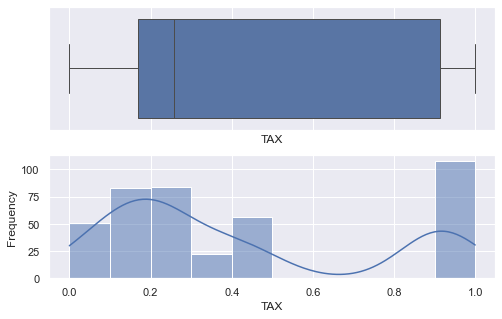

<Figure size 576x360 with 0 Axes>

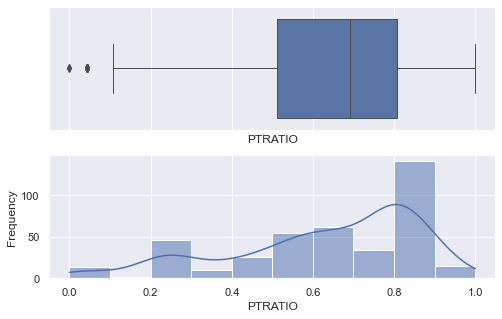

<Figure size 576x360 with 0 Axes>

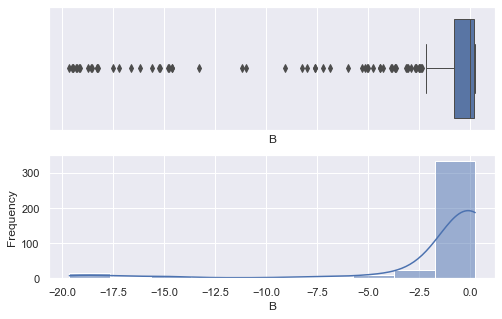

<Figure size 576x360 with 0 Axes>

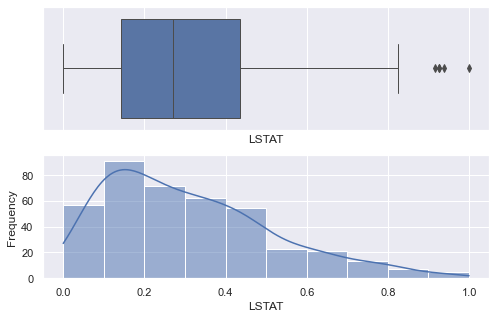

In [72]:
for i in X_test.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(X_train[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(X_train[i], ax=ax_hist , bins = 10,kde=True)

## Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

#Shapiro-Wilk Normality Test
α=0,05
H0: la muestra tiene una distribución gaussiana.
H1: la muestra no tiene distribución gaussiana.

In [33]:
from scipy import stats

for i in X_train.columns:
    shapiro_test = stats.shapiro(X_train[i])
    print( i, 'tiene un p-value= ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Se acepta la hipotesis nula, probablemente Gaussian.')
    else:
        print('Se rechaza la hipotesis nula, probablemente no Gaussiana.')

CRIM tiene un p-value=  1.7688021655257976e-33
Se rechaza la hipotesis nula, probablemente no Gaussiana.
ZN tiene un p-value=  2.078160412479741e-30
Se rechaza la hipotesis nula, probablemente no Gaussiana.
INDUS tiene un p-value=  1.1659603336533313e-15
Se rechaza la hipotesis nula, probablemente no Gaussiana.
CHAS tiene un p-value=  7.311244917983412e-37
Se rechaza la hipotesis nula, probablemente no Gaussiana.
NOX tiene un p-value=  1.2737411819729871e-11
Se rechaza la hipotesis nula, probablemente no Gaussiana.
RM tiene un p-value=  6.218199928298418e-07
Se rechaza la hipotesis nula, probablemente no Gaussiana.
AGE tiene un p-value=  1.2968021482904135e-16
Se rechaza la hipotesis nula, probablemente no Gaussiana.
DIS tiene un p-value=  1.3148238330344328e-15
Se rechaza la hipotesis nula, probablemente no Gaussiana.
RAD tiene un p-value=  4.0529920714006194e-27
Se rechaza la hipotesis nula, probablemente no Gaussiana.
TAX tiene un p-value=  2.495293109497602e-21
Se rechaza la hipote

In [56]:
for i in X_test.columns:
    shapiro_test = stats.shapiro(X_test[i])
    print( i, 'tiene un p-value= ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Se acepta la hipotesis nula, probablemente Gaussian.')
    else:
        print('Se rechaza la hipotesis nula, probablemente no Gaussiana.')

CRIM tiene un p-value=  2.6516626148508214e-17
Se rechaza la hipotesis nula, probablemente no Gaussiana.
ZN tiene un p-value=  5.2958309733519123e-17
Se rechaza la hipotesis nula, probablemente no Gaussiana.
INDUS tiene un p-value=  2.006331527582006e-07
Se rechaza la hipotesis nula, probablemente no Gaussiana.
CHAS tiene un p-value=  3.5316870456212186e-20
Se rechaza la hipotesis nula, probablemente no Gaussiana.
NOX tiene un p-value=  2.480220018696855e-06
Se rechaza la hipotesis nula, probablemente no Gaussiana.
RM tiene un p-value=  5.555942834689631e-07
Se rechaza la hipotesis nula, probablemente no Gaussiana.
AGE tiene un p-value=  1.2905961739306804e-06
Se rechaza la hipotesis nula, probablemente no Gaussiana.
DIS tiene un p-value=  4.026493115816265e-06
Se rechaza la hipotesis nula, probablemente no Gaussiana.
RAD tiene un p-value=  3.1269878721963684e-13
Se rechaza la hipotesis nula, probablemente no Gaussiana.
TAX tiene un p-value=  1.550340827938257e-10
Se rechaza la hipotes

In [57]:
#Porcentaje  de  outliers en cada variable
for k, v in X_train.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df_housing)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 10.67%
Column ZN outliers = 7.11%
Column INDUS outliers = 0.00%
Column CHAS outliers = 79.84%
Column NOX outliers = 0.00%
Column RM outliers = 3.16%
Column AGE outliers = 0.00%
Column DIS outliers = 0.79%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.77%
Column B outliers = 12.06%
Column LSTAT outliers = 0.99%


In [58]:
#Porcentaje  de  outliers en cada variable
for k, v in X_test.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df_housing)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 2.17%
Column ZN outliers = 20.16%
Column INDUS outliers = 0.00%
Column CHAS outliers = 20.16%
Column NOX outliers = 0.99%
Column RM outliers = 2.17%
Column AGE outliers = 0.00%
Column DIS outliers = 0.20%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 0.00%
Column B outliers = 3.16%
Column LSTAT outliers = 0.79%


* No hay variables gausianas. 
* La variable CHAS es dummie.
* Las variables CRIM, ZN, RM, PTRATIO, B, LSTAT, MEDV continen Outbliers significativos por lo que aplicamos RobustScaler, en las columnas sin utliers y no gaussianas aplicamos MinMaxScaler.

In [76]:
df_copia = df_housing.copy()
df_copia.head()

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.069593  1.44  0.067815     0  0.314815  0.496612  0.641607  0.269203   
1 -0.063755  0.00  0.242302     0  0.172840  0.287940  0.782698  0.348962   
2 -0.063760  0.00  0.242302     0  0.172840  1.323171  0.599382  0.348962   
3 -0.062347  0.00  0.063050     0  0.150206  1.069783  0.441813  0.448545   
4 -0.052144  0.00  0.063050     0  0.150206  1.271680  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0  0.000000  0.208015  0.287234  0.261902  0.089680  24.0  
1  0.043478  0.104962  0.553191  0.261902  0.204470  21.6  
2  0.043478  0.104962  0.553191  0.066675  0.063466  34.7  
3  0.086957  0.066794  0.648936  0.153016  0.033389  33.4  
4  0.086957  0.066794  0.648936  0.261902  0.099338  36.2

In [75]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

columnsNorm = ['INDUS', 'NOX', 'AGE', 'DIS','RAD', 'PTRATIO','TAX', 'LSTAT']
scaler = preprocessing.MinMaxScaler().fit(df_copia[columnsNorm])
df_copia[columnsNorm] = scaler.transform(df_copia[columnsNorm])

columnsRobust = ['CRIM', 'ZN', 'RM', 'B']
scaler = preprocessing.RobustScaler().fit(df_copia[columnsRobust])
df_copia[columnsRobust] = scaler.transform(df_copia[columnsRobust])

### - Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [77]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [78]:
df_copia.describe()

CRIM          ZN       INDUS        CHAS         NOX  \
count  5.060000e+02  506.000000  506.000000  506.000000  506.000000   
mean   9.337910e-01    0.909091    0.391378    0.069170    0.349167   
std    2.392616e+00    1.865796    0.251479    0.253994    0.238431   
min   -6.959315e-02    0.000000    0.000000    0.000000    0.000000   
25%   -4.852940e-02    0.000000    0.173387    0.000000    0.131687   
50%   -7.697835e-18    0.000000    0.338343    0.000000    0.314815   
75%    9.514706e-01    1.000000    0.646628    0.000000    0.491770   
max    2.467838e+01    8.000000    1.000000    1.000000    1.000000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.103163    0.676364    0.242381    0.371713    0.422208    0.622929   
std      0.952056    0.289896    0.191482    0.378576    0.321636    0.230313   
min     -3.587398    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     -0.437669    0.433831    0.088259    0.130435    0.175573    0.510638   
50%      0.000000    0.768280    0.188949    0.173913    0.272901    0.686170   
75%      0.562331    0.938980    0.369088    1.000000    0.914122    0.808511   
max      3.484417    1.000000    1.000000    1.000000    1.000000    1.000000   

                B       LSTAT        MEDV  
count  506.000000  506.000000  506.000000  
mean    -1.667632    0.301409   22.532806  
std      4.379176    0.197049    9.197104  
min    -18.761003    0.000000    5.000000  
25%     -0.770476    0.144040   17.025000  
50%      0.000000    0.265728   21.200000  
75%      0.229524    0.420116   25.000000  
max      0.261902    1.000000   50.000000

<AxesSubplot:>

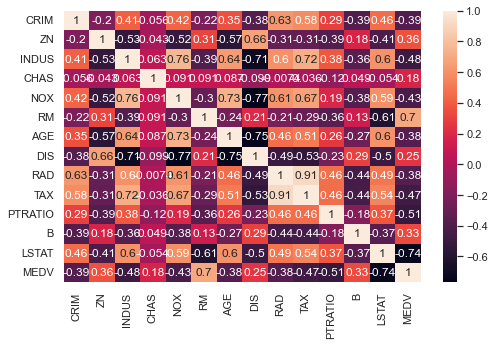

In [79]:
corr = df_copia.corr()
sns.heatmap(corr, annot=True)

<Figure size 576x360 with 0 Axes>

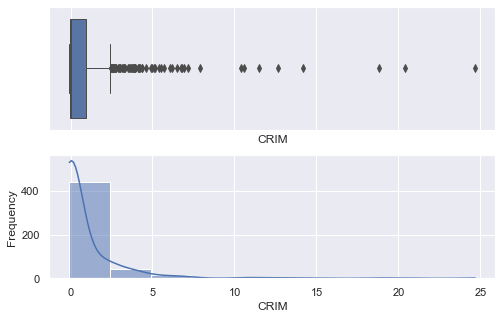

<Figure size 576x360 with 0 Axes>

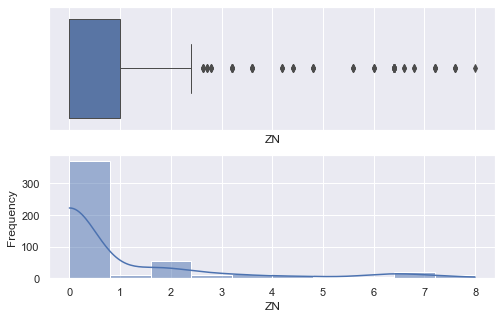

<Figure size 576x360 with 0 Axes>

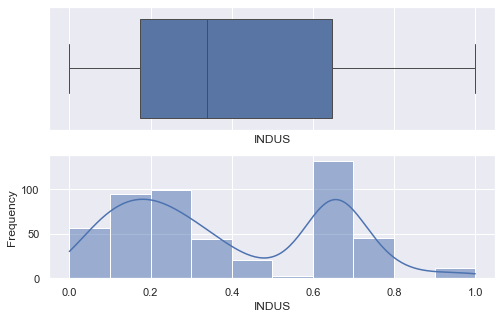

<Figure size 576x360 with 0 Axes>

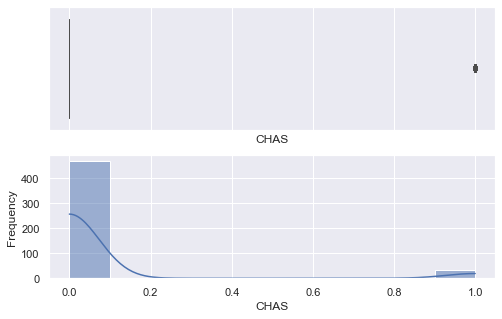

<Figure size 576x360 with 0 Axes>

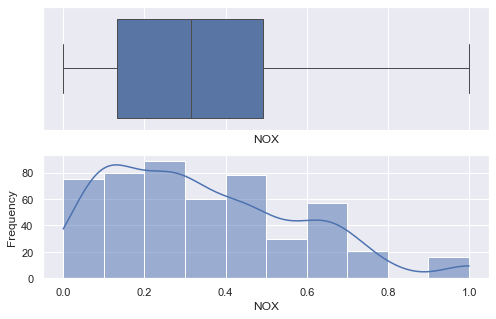

<Figure size 576x360 with 0 Axes>

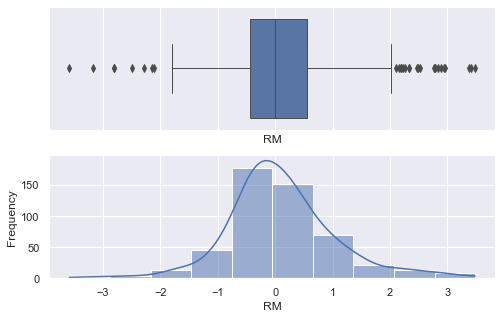

<Figure size 576x360 with 0 Axes>

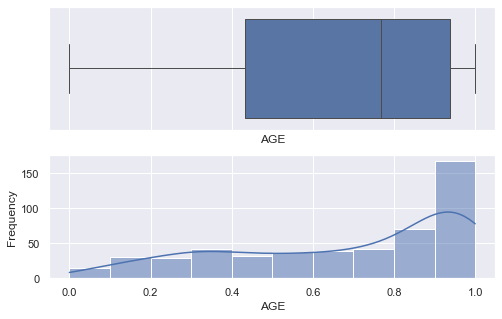

<Figure size 576x360 with 0 Axes>

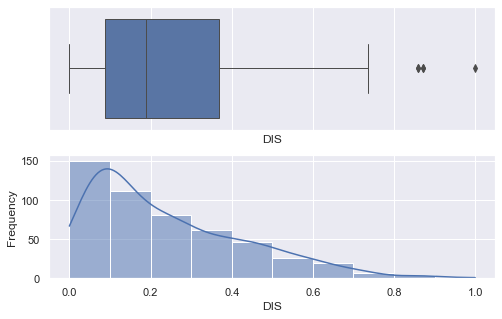

<Figure size 576x360 with 0 Axes>

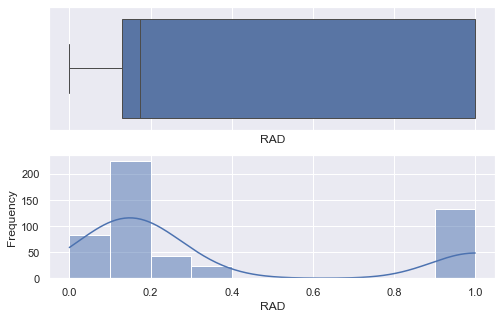

<Figure size 576x360 with 0 Axes>

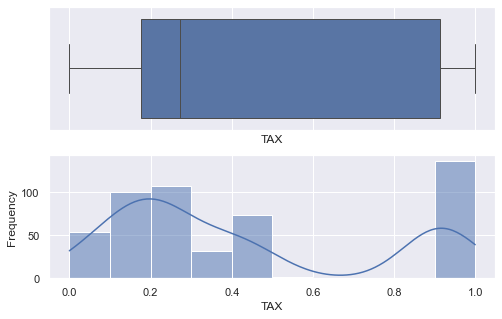

<Figure size 576x360 with 0 Axes>

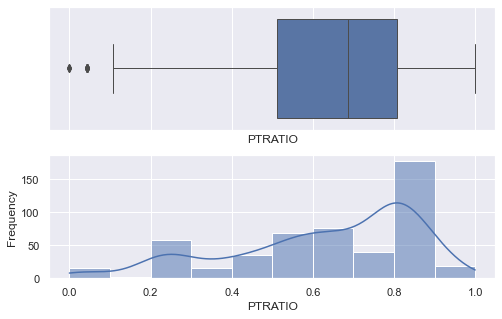

<Figure size 576x360 with 0 Axes>

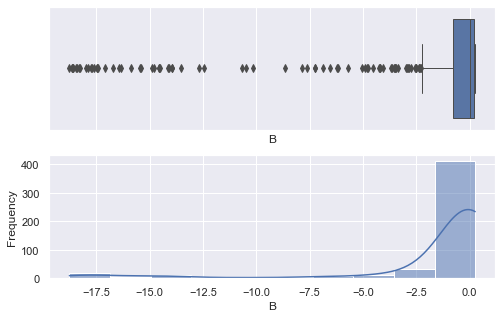

<Figure size 576x360 with 0 Axes>

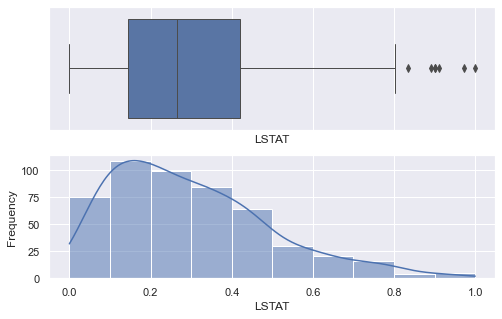

<Figure size 576x360 with 0 Axes>

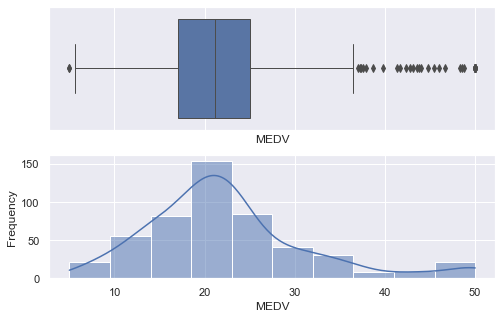

In [80]:
for i in df_copia.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df_housing[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df_housing[i], ax=ax_hist , bins = 10,kde=True)